   # Titanic Machine Learning from Disaster
![alt text](stower_titanic.jpg)

## Introduction
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.This data science project will give you introdcution on how to use Python to apply various machine learning techniques  to the RMS Titanic dataset and predict which passenger would have survived the tragedy.

### The Data

The dataset consists of 11 predictor variables and a binary target variable "survived". The features include assengerId
* Pclass
* Name
* Sex
* Age
* SibSp
* Parch
* Ticket
* Fare
* Cabin
* Embarked

There are 891 records of passengers, out of which 342 survied and 549 who did not survive.


In [1]:
import pandas as pd
from pandas import Series,DataFrame 

import matplotlib.pyplot as plt
%pylab inline

import seaborn as sns; sns.set()


Populating the interactive namespace from numpy and matplotlib


In [2]:
#Load the dataset
titanic_df=pd.read_csv("train.csv")
#Fetch the top head rows
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Analysing
* We know that women and children were more likely to survive. Thus Age, sex are probably good predictors
* Its also logical to think that passenger class might affect the outcome, as first class were closer to the deck of the ship
* Fare is highly tied to passenger class, and will probably be highly corelated with it,might add some additional information
* Number of siblings and parents/children will probably be corealted with survival one way or the other, as either there are 
* more people to help you, or more people to think about you and trying to save



### Statistical summary 

In [3]:
# Numeric series - Binary
#DESCRIBE : It takes one variable and it gives details on that variable
titanic_df['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [5]:
# Categoric series - Float
# DESCRIBE on categories seris : Gives the count and no of unique values
titanic_df['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [6]:
# Apply value counts
# 491 were travelling 3rd class
# 216 were travelling 1st class
# 184 were travelling 2nd class
titanic_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [7]:
# Describe on every variable
# statistical summary on an id does not make sense
# Pclass should be treated as categorical variable
# age is important. Mean age is 29
# minimum is .4
titanic_df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# PLOT

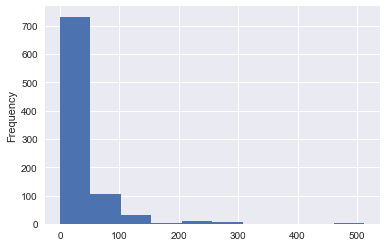

In [8]:
#populating interactive namepspace from numpy and matplotlib
titanic_df['Fare'].plot(kind="hist")
# Most ticket are at 50 dollars
# Some tickets between 200 to 300 dollars
# one or couple of ticket costing 500 dollars . These are outliers as they are too expensive


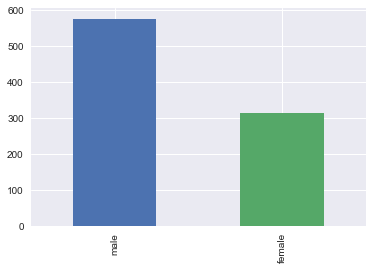

In [9]:
#Sex
titanic_df['Sex'].value_counts().plot(kind='bar')

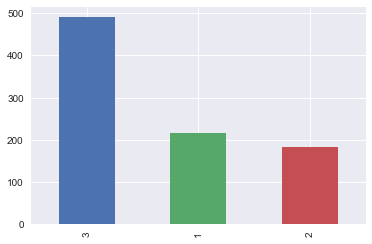

In [10]:
# No of siblings
titanic_df['Pclass'].value_counts().plot(kind='bar')
# Around 500 with no siblings
# Around 200 with 1 siblings

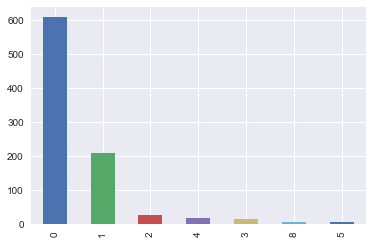

In [11]:
titanic_df['SibSp'].value_counts().plot(kind='bar')

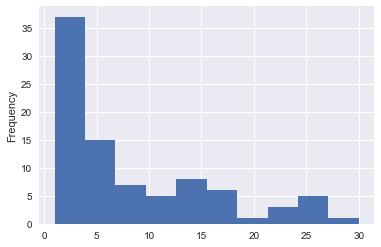

In [12]:
# Task 1
# Histogram for age
titanic_df['Age'].value_counts().plot(kind='hist')
# Age is an example of (Approximately) NORMALLY DISTRIBUTED  

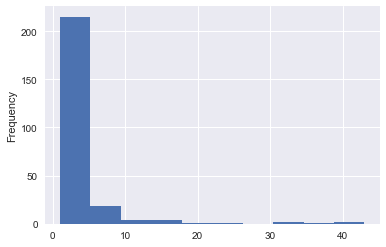

In [13]:
# Task 1
# Histogram for age
titanic_df['Fare'].value_counts().plot(kind='hist')
# Fare is an example of SKEEWED VARIABLE

#Note We need to identify SKEEWED VARIABLE AND (Approximately) normally distributed variable.
# This is needed for imputing
# WE CAN USE MEAN OR MEDIAN TO IMPUTE DATA
# NORMALLY DISTRIBUTED VARIABLE : MEAN AND MEDIAN WOULD WORK
# SKEEW

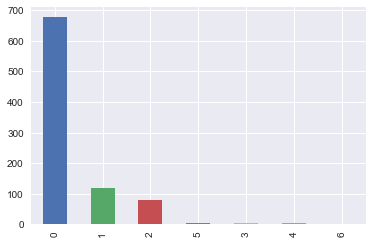

In [14]:
#Task 2
titanic_df['Parch'].value_counts().plot(kind='Bar')

#The Groupby() method to inspect relationship in the data
Can interpret it as having the same functionality as Pivot excel


In [15]:
# Travellers who payed average of 22 dollars did not survive
# travellers who payed average of 48 dollars did not survive

# CROSS VALIDATION WHEN WE CHANGE THE VARIABLE AND SEE HOW VARIABLES BEHAVE AGAINST VALUES OF THE OTHERS
titanic_df[['Survived','Age','Fare']].groupby('Survived').mean()

,Age,Fare
Survived,,
0,30.626179,22.117887
1,28.343690,48.395408


In [16]:
titanic_df[['Pclass','Survived','Age','Fare']].groupby('Pclass').mean()
# Travellers who travelled in 1st class 62 percentage survived
# travellers who travelled in 2nd class 29 percentage survived
# travellers who travelled in 2nd class 25 percentage survived
# Note Fiar and Pclass are corelated

,Survived,Age,Fare
Pclass,,,
1,0.629630,38.233441,84.154687
2,0.472826,29.877630,20.662183
3,0.242363,25.140620,13.675550


In [17]:
# Group by no of siblings and see how much they paid on an average a ticket
titanic_df[['SibSp','Fare']].groupby('SibSp').mean()


,Fare
SibSp,
0,25.692028
1,44.147370
2,51.753718
3,68.908862
4,31.855556
5,46.900000
8,69.550000


In [18]:
#Percentage of survivors by PClass
# Mean of a binary variable is a percentage
titanic_df[['Pclass','Survived']].groupby('Pclass').mean()
#62 percentage of the people travelling 1st class survived
#47 percentage of the people travelling 2nd class survived
#24 percentage of the people travelling 3rd class survived

# Percentage of survival within each class they would not sum up to 100

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [19]:
titanic_df.Survived.mean()
#Percentage of the travellers who survived
#38% percentage survived
#Passenger class 1 was above the mean
#Passenger class 2 is also above the mean
#Passenger class 3 is less then the mean


0.3838383838383838

### Handling for Missing data fillna()
PasengerId count is 891 , Age is 714.There are 71 rows where age is missing
Data is not clean.

    RoWs: we do not want to get rid of the column as more data would help us to train it better
    Columns:We do not want to get rid of the column (Age) is important for analysis




In [20]:
titanic_df[['Age']].head()


,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [21]:
titanic_df[['Age']].tail()
# here we see the missing value

,Age
886,27.0
887,19.0
888,NaN
889,26.0
890,32.0


In [22]:
titanic_df[['Age']].isnull().tail()
## 888 has missing age

,Age
886,False
887,False
888,True
889,False
890,False


In [23]:
# Age is normally distributed variable
#Normally distributed variable mean or medain would work.
#Skeewed variable we would use medain it represents reality
#CERTAIN MACHINE LEARNING ALGORITHM WOULD NOT TAKE NULL VALUES. SO WE NEED TO IMPUTE
titanic_df.Fare.mean()

print(titanic_df['Age'].median())



28.0


### IMPUTE MISSING VALUES AGE (Numerical)


In [24]:
Age_median=titanic_df['Age'].median()
#print(Age_median)
titanic_df["Age"]=titanic_df["Age"].fillna(Age_median)
#titanic_df["Age"]=titanic_df["Age"].fillna(Age_median,inplace=True) . This would modify the series where it is
print(Age_median)

28.0


In [25]:
titanic_df["Age"].tail()


886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, dtype: float64

### IMPUTE MISSING VALUES EMBARKED VARIABLE(Categorical)

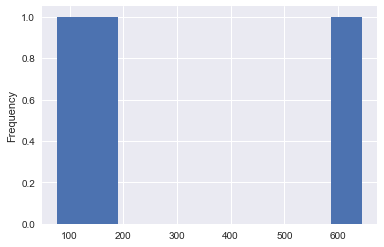

In [26]:
titanic_df['Embarked'].value_counts().plot(kind='hist')
#NORAMALLY DISTRIBUTED VARIABLE
#We can take median or mean


In [27]:
titanic_df['Embarked'].describe()


count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [28]:
#Missing values
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [29]:
#Here we are imputing S because we know that TOP VALUE IS "S"
titanic_df["Embarked"].fillna('S',inplace=True) #C = Cherbourg, Q = Queenstown, S = Southampton

### CONVERT CATEGORICAL VARIABLE INTO BINARY

In [30]:

titanic_df.loc[titanic_df['Sex'] == 'male','Sex'] = 0
titanic_df.loc[titanic_df['Sex'] == 'female','Sex'] = 1

In [31]:
titanic_df['Sex'].unique() 
# This shows the numerical values prese in sex

array([0, 1], dtype=int64)

In [32]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
#Convert embarked into binary variable
#Convert "S" to 0, "c" to 1 and "Q to 2 in Embarked column
titanic_df.loc[titanic_df["Embarked"] == "S", "Embarked"] = 0
titanic_df.loc[titanic_df["Embarked"] == "C", "Embarked"] = 1
titanic_df.loc[titanic_df["Embarked"] == "Q", "Embarked"] = 2

titanic_df.Embarked.unique()

array([0, 1, 2], dtype=int64)

In [34]:
# Columns which would be used to predict the target
# Age, Pclass, Sex, SibSp,Fare, Parch and Embarked
titanic_df
x = titanic_df[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]].values
#print(x)
y = titanic_df["Survived"].values


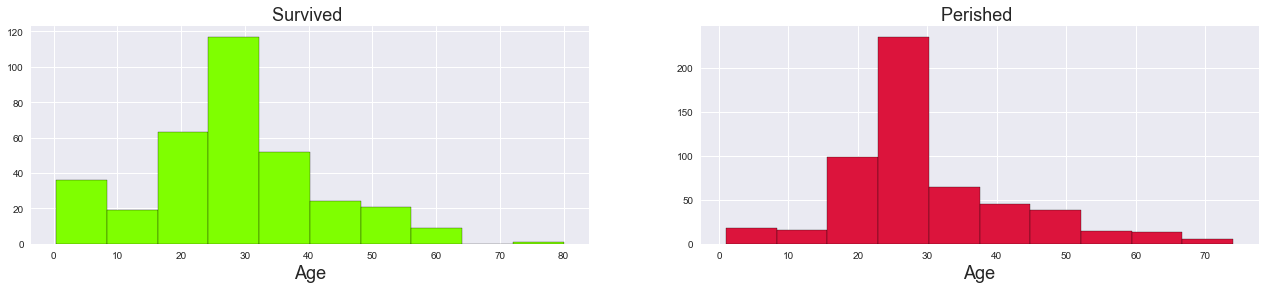

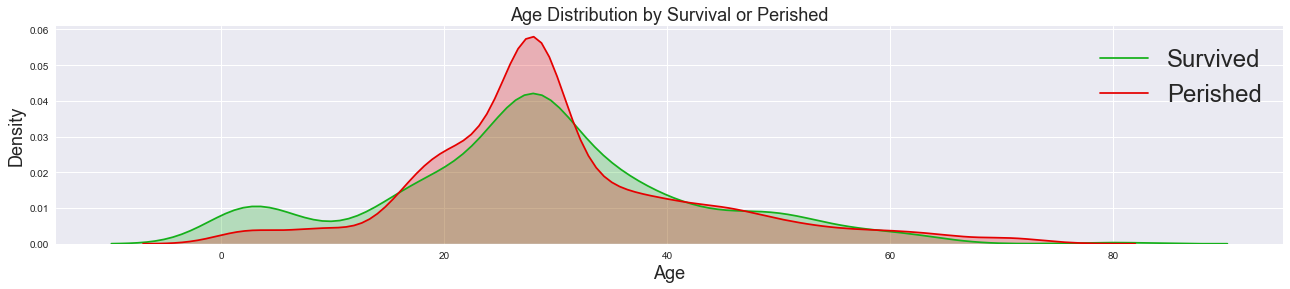

In [50]:
#Histogram
fig, ax = plt.subplots(1, 2, figsize=(22,4))
ax[0].hist(titanic_df.loc[titanic_df['Survived'] == 1, "Age"], color = 'chartreuse', edgecolor='black')
ax[0].set_title('Survived ', fontsize = 18)
ax[0].set_xlabel('Age', fontsize = 18)
ax[1].hist(titanic_df.loc[titanic_df['Survived'] == 0, "Age"], color = 'crimson', edgecolor='black')
ax[1].set_title('Perished ', fontsize = 18)
ax[1].set_xlabel('Age', fontsize = 18)

# Density Plot
fig, ax = plt.subplots(figsize=(22,4))
ax = sns.kdeplot(titanic_df.loc[titanic_df['Survived'] == 1, "Age"], shade=True, color=sns.xkcd_rgb["green"], label="Survived")
ax = sns.kdeplot(titanic_df.loc[titanic_df['Survived'] == 0, "Age"], shade=True, color=sns.xkcd_rgb["red"], label="Perished")
ax.set_title('Age Distribution by Survival or Perished', fontsize = 18)
ax.set_ylabel('Density', fontsize = 18)
ax.set_xlabel('Age', fontsize = 18)
plt.legend(fontsize=24)
plt.show()

# Train/Test split


In [35]:
from sklearn.model_selection import train_test_split

# split dataset into test/train  using All features
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.3)

# Scale/Standardize

In [36]:
from sklearn.preprocessing import StandardScaler

# scale/standardize features
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test) 
X_train_std[:5]

array([[ 0.80278702,  1.36783323, -0.95252874, -0.47149154, -0.4764597 ,
        -0.35793161,  1.04152381],
       [-0.40527171,  1.36783323, -0.12477329,  0.4915879 , -0.4764597 ,
        -0.1527973 ,  1.04152381],
       [ 0.80278702, -0.73108328, -0.12477329, -0.47149154, -0.4764597 ,
        -0.49901694, -0.55274974],
       [ 0.80278702, -0.73108328, -0.72677726, -0.47149154, -0.4764597 ,
        -0.45709444, -0.55274974],
       [-0.40527171, -0.73108328, -0.12477329, -0.47149154, -0.4764597 ,
        -0.66876651, -0.55274974]])

 # Essentials of Modeling(Overfitting and cross validation)   `

The aim of machine learning is generalization

* We want to train on the different dat than we make predictions on.This is critical if we want to avoid overfitting.

OVERFITTING: Model fits itself to "noise" not signal.
* Every dataset has its own quirks that dont exist in the full population.
* IF asked to predict the top speed of the car from its horse power and other characteristic and if we have a dataset that randomly had cars with high speed, We would create a model that over stated speed.
* The way to figure out if our model is doing this is to evaluate its performance on data that it hasnt used
* Every machine learning algorithm can overfit.Linear regression are much prone to it
* If we evaluate our algorithm on the same dataset it would definetly overfit

CROSS VALIDATION
* Simple way to avoid overfitting
* To Cross validate we split the data into no of parts

Ex :Split data into 3 parts
* Combine the first 2 parts,train a model, make predections on the third
* Combine the fisrt and the third part and make predections on the second
* Combine the third and the second part and make predictions on the first


# scikit learn
* Model Families from where we import 
* Declaring an estimator object exposes its methods to us
* These include fit, transform and predict
* Parameters are defined when declaring the estimator object'

Note: We do not have to change our code to use different models



Model.fit : Train the model
Model.Predict : Testing the model¶

# LOGISTIC REGRESSION
Takes the output of Linear regression and map it so that it is between 0 and 1.
We can use logit function
Passing any value to the logit function would map it to a value between 0 to 1 by squeezing extreme values

WE CAN USE A SKLEARN HELPER FUNCTION TO DO CROSS VALIDATION AND EVALUATION FOR US

# ISSUE WITH LINEAR REGRESSION
* We use it for salary or housing price prediction
* When we have a categorical dependent variable then we would not use it
  Ex : Whether a customer would default?  Whether the customer would buy? 
      it is numeric.( However it is binary numeric) 
      Note: In the above case we use LOGISTICAL REGRESSION
      In our case we have a binary outcome which is categorical in nature
      
# ALTERNATE TO LOGICAL REGRESSION FOR BINARY CLASSIFICATION WOULD BE DECISION TREE, SUPPORT VECTOR MACHINES  ETC..


# Models

In [37]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C = 1)

# k-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Support Vector Machine
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1)

# Random Forest (ensemble of Decision Trees)
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=1, random_state=0)

# Neural Network
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, X_train_std, y_train, scoring='accuracy', cv=10)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())               # accuracy measure
    print("Standard deviation:", scores.std())  # std measures how precise the measure is
    
display_scores(scores)

#SUPPORT VECTOR MACHINE TAKES
Kernal,c,gama
#Linear classifiers
Aplha,penalty
#Random forest
n_estimators

Note: When we move across algorithms, sytax does not change
      As we define the object a few methods would become available to us   


# 10 Fold Cross validation

In [39]:
#Have all the algorithsm in an array
classifiers = [log_reg, knn, svm, forest, nn]

model_scores = []
for clf in classifiers:
    model_scores.append(cross_val_score(clf, X_train_std, y_train, scoring='accuracy', cv=10))
#com

C:\Users\Prath\Anaconda3\AnacondaLatest\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Prath\Anaconda3\AnacondaLatest\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Prath\Anaconda3\AnacondaLatest\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Prath\Anaconda3\AnacondaLatest\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

In [40]:
#Combination DF
combination_df=pd.DataFrame(model_scores,columns=[1,2,3,4,5,6,7,8,9,10],index=["LR","KNN","SVM","Forest","NN"])

In [41]:
#Mean
combination_df["Mean"]=combination_df.mean(axis=1)
combination_df



,1,2,3,4,5,6,7,8,9,10,Mean
LR,0.746032,0.777778,0.809524,0.825397,0.825397,0.857143,0.822581,0.819672,0.803279,0.786885,0.807369
KNN,0.793651,0.809524,0.857143,0.809524,0.825397,0.825397,0.774194,0.885246,0.836066,0.803279,0.821942
SVM,0.730159,0.777778,0.825397,0.777778,0.888889,0.793651,0.806452,0.819672,0.836066,0.754098,0.800994
Forest,0.698413,0.634921,0.761905,0.746032,0.698413,0.746032,0.709677,0.721311,0.786885,0.688525,0.719211
NN,0.809524,0.809524,0.873016,0.825397,0.888889,0.888889,0.822581,0.868852,0.852459,0.803279,0.844241


# Boxplot

Text(0.5,1,'Classification Accuracy using All Features')

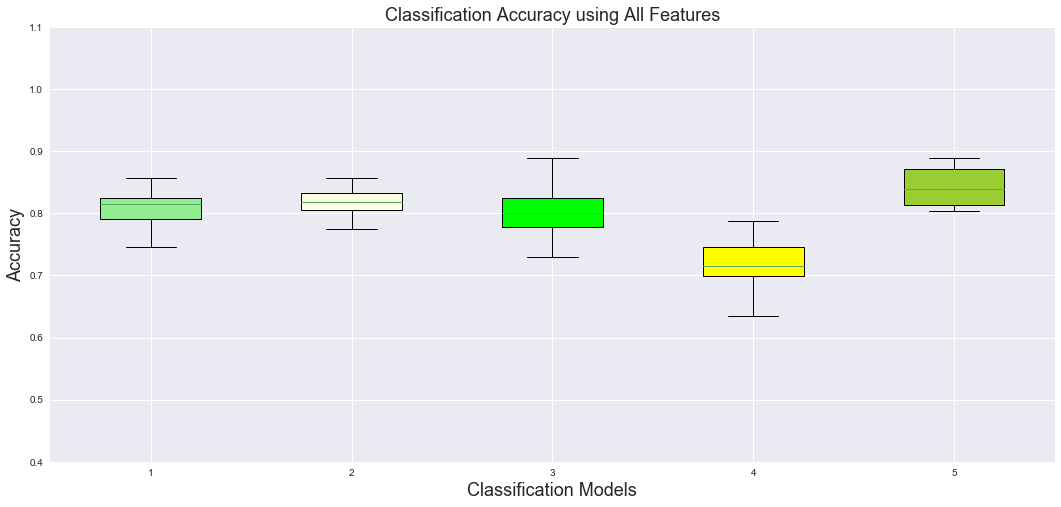

In [42]:
## BOXPLOT comparing models and comparing SVM using different feature subsets
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 8))
# rectangular box plot
bplot_models = axes.boxplot(model_scores, vert=True, patch_artist=True)

# fill with colors - Models
colors_d = ["lightgreen", "lightyellow", "lime", "yellow", "yellowgreen"]
for patch, color in zip(bplot_models['boxes'], colors_d):
    patch.set_facecolor(color)
    
    # adding axes labels
axes.yaxis.grid(True)
axes.set_xticks([y+1 for y in range(len(model_scores))])
axes.set_xlabel('Classification Models', fontsize=18)
axes.set_ylabel('Accuracy', fontsize=18)
axes.set_ylim((.4, 1.1))
axes.set_title('Classification Accuracy using All Features', fontsize = 18)

In [43]:
# Random Forest Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

nn.fit(X_train, y_train)
y_pred = forest.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')


NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.